# Numeric properties of 2025

Anton Antonov  
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com)   
January 2025   


-----

## Introduction

This blog post demonstrates many of the mathematical properties for the number `2025` given in the Wolfram notebook ["Happy 2025 == 1³+2³+3³+4³+5³+6³+7³+8³+9³ !"](https://community.wolfram.com/groups/-/m/t/3347182), [EPn1], ​by [Ed Pegg Jr](https://en.wikipedia.org/wiki/Ed_Pegg_Jr.).

We cannot computationally demonstrate _easily_ all of the properties in Raku; for the full exposition of them see [EPn1].


----

## Most impressive

First, let us demonstrate the most impressive numeric property of `2025`:

$$
2025 = 1^3 + 2^3 + 3^3 + 4^3 + 5^3 + 6^3 + 7^3 + 8^3 + 9^3 = (1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9)^2
$$

This comes from the following identify, often referred to as [Faulhaber’s Formula or Nicomachus’s Theorem](https://mathworld.wolfram.com/FaulhabersFormula.html):

$$
\sum _n^{k=1} k^3=\left(\sum _n^{k=1} k\right){}^2
$$

In [1]:
say "Sum of cubes of 1..9 : ", [+] (1..9)>>³;
say "Sum of 1..9 squared  : ", ((1..9).sum)²;

Sum of cubes of 1..9 : 2025
Sum of 1..9 squared  : 2025


-----

## Simple

Next, let us demonstrate the simple numeric properties of `2025`.

`2025` is obtained by the square of the sum of (i) the number of the first two digits, `20`, with (ii) the number of the 3rd and 4th digits, `25`:

In [2]:
 (20+25) ** 2

2025

An odd property of the square root, `45 == 2025.sqrt`, is that it is the smallest integer where the periodic part of the reciprocal is `2`:

In [8]:
use Rat::Precise;
(1/45).precise(40)

0.0222222222222222222222222222222222222222

`2025` is the denominator for this sum of squares:

In [11]:
(1/9² + 1/5²).nude

(106 2025)

-----

## Divisors-based

`2025` is the product of greatest common divisors of `15` for numbers less than `15`:

In [23]:
[*] (1..14).map(15 gcd *)

2025

`2025` is the product of the proper divisors of `45`:

In [34]:
use Math::Sequences::Integer :support;
my @proper = divisors(45).head(*-1)

[1 3 5 9 15]

In [35]:
[*] |@proper

2025

The package ["Math::Sequences"](https://raku.land/zef:raku-community-modules/Math::Sequences) has the functions [`sigma`](https://en.wikipedia.org/wiki/Divisor_function) (aka $\sigma$) and [`totient`](https://en.wikipedia.org/wiki/Euler%27s_totient_function) (aka $\phi$, not to be confused with the [Golden ratio](https://en.wikipedia.org/wiki/Golden_ratio) $\varphi$) that -- in principle -- can be used to demonstrate the ***rare property***:

$$
\sigma_1(\phi(2025^3)) = \phi(\sigma_1(2025^3))
$$

But those package functions are too slow. Instead, we are using a chatbook [Wolfram|Alpha](https://www.wolframalpha.com) cell, 
[[AA1](https://rakuforprediction.wordpress.com/2024/05/18/chatbook-new-magic-cells/),
 [AA2](https://rakuforprediction.wordpress.com/2024/05/06/wwwwolframalpha/)],
to verify that formula:


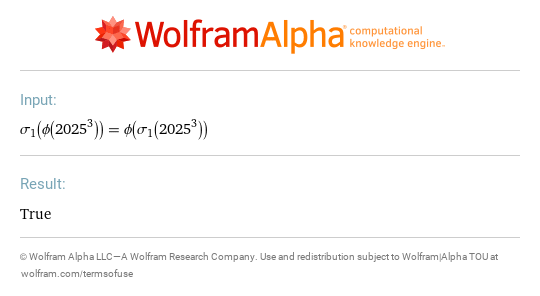

In [36]:
#% wolfram-alpha
DivisorSigma[1, EulerPhi[2025^3]] == EulerPhi[DivisorSigma[1, 2025^3]] 

----

## Phi number system

Digits of `2025` represented in the [Phi number system](https://mathworld.wolfram.com/PhiNumberSystem.html):

In [1]:
use Math::Sequences::Numberphile;
my @res = phi-number-system(2025);

[15 13 10 5 3 1 -6 -11 -16]

Verification:

In [4]:
@res.map({ ϕ ** $_ }).sum.round(10e-11);

2025

**Remark:** We have to round (using a small multiple of `10`) because of the approximation of the golden ratio used in "Math::Sequences".

----

## Good permutations

From [EPn1]:

> There are also 2025 “good” permutations ([A006717](https://oeis.org/A006717)), where all rotations have a single number in the correct place.

```mathematica
goodPermutations = Select[Permutations[Range[9]],Union[Table[Count[RotateRight[#,k]-Range[9],0],{k,0,8}]]=={1}&]; 

goodPermutations//Length
```

Here is the corresponding Raku code:

In [1]:
my @good-permutations = [1..9].permutations.race(:4degree).grep( -> @p {
    my @res = (^9).map( -> $k { (@p.rotate(-$k) <<->> (1...9)).grep(*==0).elems }).unique.sort;
    @res eqv [1]    
});

@good-permutations.elems

2025

Here are the first of the "good" permutations:

In [3]:
#% html
@good-permutations.head
==> -> @p { (^9).map( -> $k { @p.rotate(-$k) }) }()
==> { $_[(1, 9, 2, 7, 6, 8, 4, 3, 5) <<->> 1]}()
==> { .map((1..9) Z=> *)».Hash.Array }()
==> to-dataset()
==> to-html(field-names => (1..9)».Str)

1,2,3,4,5,6,7,8,9
1,3,2,7,9,8,4,6,5
3,2,7,9,8,4,6,5,1
5,1,3,2,7,9,8,4,6
7,9,8,4,6,5,1,3,2
9,8,4,6,5,1,3,2,7
2,7,9,8,4,6,5,1,3
4,6,5,1,3,2,7,9,8
6,5,1,3,2,7,9,8,4
8,4,6,5,1,3,2,7,9


**Remark:** The diagonal of the table is with the digits from 1 to 9. Observe the "shifts" between the consecutive rows above.

-----

## References

[AA1] Anton Antonov, ["Chatbook New Magic Cells"](https://rakuforprediction.wordpress.com/2024/05/18/chatbook-new-magic-cells/), (2024), [RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[AA2] Anton Antonov, ["WWW::WolframAlpha"](https://rakuforprediction.wordpress.com/2024/05/06/wwwwolframalpha/), (2024), [RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[EPn1] Ed Pegg, ["Happy 2025 =1³+2³+3³+4³+5³+6³+7³+8³+9³!"](https://community.wolfram.com/groups/-/m/t/3347182), ​Wolfram Community, STAFFPICKS, December 30, 2024​.
